# Clustering
## 분류의 두가지 종류
1. Classification(분류)
- 지도 학습 : 각 개체별 그룹의 Label이 사전에 알려져있을 때 사용하는 분석방법
- Classification : 기존에 존재하는 데이터의 카테고리 라벨을 파악하고, 새롭게 관측된 데이터의 카테고리를 스스로 판별하는 과정
- 목적 : 라벨이 있을 때, 새로운 데이터 그룹을 예측하기 위한 목적
2. Clustering(군집)
- 비지도 학습 : 군집의 수, 속성 즉 Label 이 사전에 알려져 있지 않을 때 사용하는 분석방법
- Clustering : 데이터 간의 유사도를 정의하고, 그 유사도에 가까운 것부터 순서대로 합쳐가는 방법
- Ex) k-means, DBSCAN, ...
- 목적 : 각 개체의 범주가 군집 정보를 모를 때(라벨 X) 데이터 자체의 특성에 대해 알고자하는 목적
- 군집 분석(Clustering)의 원리
    - 거리가 가까운 (유사도 ⬆️) 개체들을 서로 묶어 하나의 그룹으로 정리함
        * 거리(유사도) 계산 방법: 유클리드 거리(피타고라스), 맨해튼 거리(절대값)
- 군집화 방법
    1. 비계층적 군집분석(Non-Hierarchical Clustering)
    * 계층을 두지않고 그룹화를 할 유사도 측정 방식에 따라 최적의 그룹(cluster)을 계속적으로 찾아나가는 방법
    * 방법 2가지
        * 중심 기반(Center-based) : K-means
        * 밀도 기반(Density-based) : DBSCAN
    2. 계층적 군집분석(Hierarchical Clustering)
    * 병학적 방법 + 분할적 방법을 바탕으로 군집 형성되고, 한 관찰단위는 한 군집에 속하면 다른 군집에 속하지 못함
        * 병합적 방법: 가까운 관찰단위끼리 군집 형성
        * 분할적 방법 : 거리가 먼 관찰단위들을 나누어가는 방법  
        <br>
    - <img src="imgs/Clustering.png" width="350" height="200">



# K-Means
## 1. K-Means 란?
- 사전에 결정된 군집 수 K에 기초하여 전체 데이터를 상대적으로 유사한 K개의 군집으로 구분하는 방법

## 2. K-Means 장단점
- 장점
    * 관찰 데이터 거리만이 분석에 필요한 입력 값이기 때문에, 빠르고 간단하게 적용 가능
    * 데이터에 관한 사전 정보가 필요하지 않고, 사전에 특정 변수에 관한 역할 정의가 필요하지 않음
- 단점
    * 군집의 개수 K가 사전에 정의되어야 함
    * 군집 설정에 Outlier(극단좌표)의 영향이 크게 작용됨
    
## 3. K-Means 군집화의 실행단계
1. 초기점(k) 설정
    * k는 중심점(centroid)이자, 묶일 그룹(cluster)의 수와 같음
2. 그룹(cluster) 부여
    * k개의 중심점(동그라미)과 개별 데이터(네모)간의 거리를 측정함
    * 가장 가까운 중심점으로 데이터를 부여함
3. 중심점(centroid) 업데이트
    * 할당된 데이터들의 평균값(mean)으로 새로운 중심점(centroid)을 업데이트
4. 최적화
    * 2,3번 작업을 반복적으로 수행하다가 군집의 변화가 없으면 작업을 중단

## 4. 최적의 클러스터 개수 구하기
- (Page 14p)

### [실습] K-means 개요

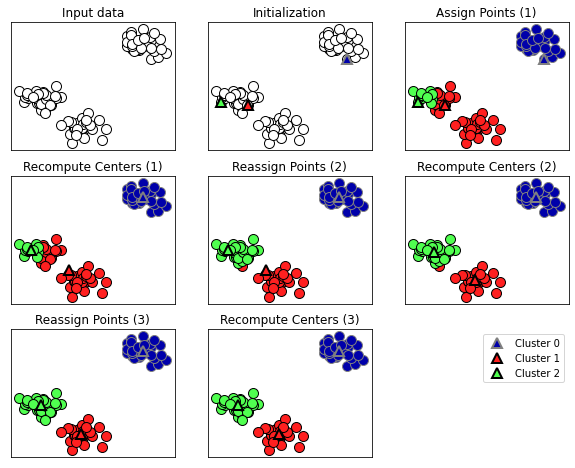

In [1]:
# Kmeans 알고리즘에 관한 설명
%matplotlib inline
import mglearn
mglearn.plots.plot_kmeans_algorithm()

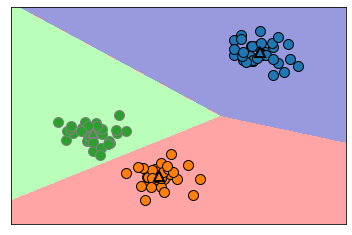

In [2]:
# Kmeans 경계표시
mglearn.plots.plot_kmeans_boundaries()

[1 1 1 0 0 0]
[1 0]
[[10.  2.]
 [ 1.  2.]]


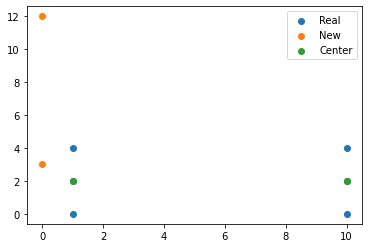

In [15]:
# KMeans 임포트
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[1,2], [1,4], [1,0], [10,2], [10, 4], [10,0]])

#2개 클러스터를 가진 KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

# 모형이 분류한 라벨 체크
print(kmeans.labels_)

#새로운 값 분류
X_new = [[0, 0], [12, 3]]
print(kmeans.predict(X_new))

#중심좌표 2개
print(kmeans.cluster_centers_)

# 산점도 확인
plt.scatter(X[:, 0], X[:, 1], label='Real')
plt.scatter(X_new[0], X_new[1], label='New')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], label='Center')
plt.legend()


### [실습] KMeans 랜덤 2차원 데이터셋

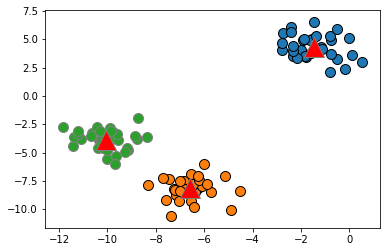

In [16]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적인 2차원 데이터셋 생성
X, y = make_blobs(random_state=1)

# KMeans 모형 생성 (군집 3개)
model = KMeans(n_clusters=3)
model.fit(X)

# 실제값
lbl = model.labels_

# 예측값
pred = model.predict(X)

# Kmeans 모델 정확도
import sklearn.metrics as sm 
sm.accuracy_score(y, pred)

# 3개 클러스터를 산점도로 표현
mglearn.discrete_scatter(X[:, 0], X[:, 1], lbl, markers='o')
# Centers
mglearn.discrete_scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], [0, 1, 2], markers='^', c='r', s=20)

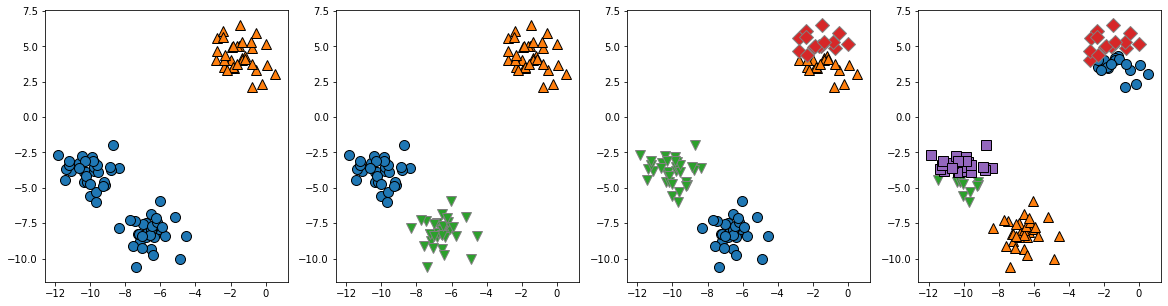

In [18]:
# 같은 데이터일지라도 k값 할당에 따라 클러스터링 결과가 달라질 수 있음
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# 2,3,4,5개의 클러스터로 나눌 경우
idx = 0
for k in [2,3,4,5]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    lbls = kmeans.labels_
    mglearn.discrete_scatter(X[:, 0], X[:, 1], lbls, ax= axes[idx])
    idx += 1